In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('AML_exam.txt',sep='\t',header=(0))

In [3]:
df.head()

,Unnamed: 0,datetime,speed
0,0,201501010000,NaN
1,1,201501010100,NaN
2,2,201501010200,NaN
3,3,201501010300,NaN
4,4,201501010400,NaN


In [4]:
df.columns

Index(['Unnamed: 0', 'datetime', 'speed'], dtype='object')

In [5]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [6]:
df.head()

,datetime,speed
0,201501010000,NaN
1,201501010100,NaN
2,201501010200,NaN
3,201501010300,NaN
4,201501010400,NaN


In [7]:
df.dtypes

datetime      int64
speed       float64
dtype: object

In [8]:
df['datetime'] = pd.to_datetime(df['datetime'],format='%Y%m%d%H%M%S')

In [9]:
df

,datetime,speed
0,2015-01-01 00:00:00,NaN
1,2015-01-01 01:00:00,NaN
2,2015-01-01 02:00:00,NaN
3,2015-01-01 03:00:00,NaN
4,2015-01-01 04:00:00,NaN
...,...,...
35059,2018-12-31 19:00:00,2.148734
35060,2018-12-31 20:00:00,1.608662
35061,2018-12-31 21:00:00,0.647012
35062,2018-12-31 22:00:00,1.206987


In [10]:
df.isnull().sum()

datetime        0
speed       16515
dtype: int64

In [11]:
#Percentage of null values
df.isnull().sum().sum()* 100 / len(df)

47.09958932238193

In [12]:
df.shape

(35064, 2)

In [13]:
#So we gonna drop the null values since they do not offer us any insights
df.dropna(inplace=True)

In [14]:
#new shape
df.shape

(18549, 2)

In [15]:
df.head()

,datetime,speed
16500,2016-11-18 12:00:00,2.098724
16501,2016-11-18 13:00:00,1.570473
16502,2016-11-18 14:00:00,2.194121
16503,2016-11-18 15:00:00,1.308761
16504,2016-11-18 16:00:00,0.522000


<Figure size 216x216 with 0 Axes>

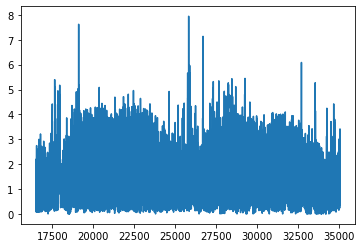

<Figure size 216x216 with 0 Axes>

In [16]:
plt.plot(df['speed'])
plt.figure(figsize=(3, 3))

In [17]:
#Converting the problem into a time series problem./ Using shift to create X and Y values
df['speed-1'] = df['speed'].shift(-1)
df.head()

,datetime,speed,speed-1
16500,2016-11-18 12:00:00,2.098724,1.570473
16501,2016-11-18 13:00:00,1.570473,2.194121
16502,2016-11-18 14:00:00,2.194121,1.308761
16503,2016-11-18 15:00:00,1.308761,0.522000
16504,2016-11-18 16:00:00,0.522000,0.252200


In [18]:
df['speed-2']= df['speed'].shift(-2)

In [22]:
#df['speed-3']= df['speed'].shift(-3)

In [19]:
#Drop the null values
df.dropna(inplace=True)

In [20]:
#Verify that there are no null values
df.isnull().sum().sum()

0

In [23]:
df.head()

,datetime,speed,speed-1,speed-2
16500,2016-11-18 12:00:00,2.098724,1.570473,2.194121
16501,2016-11-18 13:00:00,1.570473,2.194121,1.308761
16502,2016-11-18 14:00:00,2.194121,1.308761,0.522000
16503,2016-11-18 15:00:00,1.308761,0.522000,0.252200
16504,2016-11-18 16:00:00,0.522000,0.252200,0.832751


In [24]:
import numpy as np

In [69]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared,ConstantKernel
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import accuracy_score

In [26]:
X = df[['speed-1','speed-2']].to_numpy()

In [27]:
Y = df['speed'].to_numpy()

In [131]:
X_train = X[:int(X.shape[0]*0.89)]
X_test = X[int(X.shape[0]*0.89):]
Y_train = Y[:int(X.shape[0]*0.89)]
Y_test = Y[int(X.shape[0]*0.89):]

In [132]:
Y_train.shape

(16506,)

In [133]:
X_test.shape

(2041, 2)

In [134]:
# Parameters for grid search cv
param_grid = {"alpha": [1e0, 1e-1, 1e-2, 1e-3],
              "kernel": [ExpSineSquared(l, p)
                         for l in np.logspace(-2, 2, 10)
                         for p in np.logspace(0, 2, 10)]}

tscv = TimeSeriesSplit(n_splits=2)
kr = GridSearchCV(KernelRidge(), param_grid=param_grid, cv=tscv )

In [135]:
kr.fit(X_test, Y_test)

/home/mose/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/mose/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/mose/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/mose/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/mose/.local/lib/python3.8/site-pac

/home/mose/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/mose/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/mose/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/mose/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/mose/.local/lib/python3.8/site-pac

/home/mose/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/mose/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/mose/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/mose/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/mose/.local/lib/python3.8/site-pac

/home/mose/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/mose/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/mose/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/mose/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/mose/.local/lib/python3.8/site-pac

/home/mose/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/mose/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/mose/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/mose/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/mose/.local/lib/python3.8/site-pac

/home/mose/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/mose/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/mose/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/mose/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/mose/.local/lib/python3.8/site-pac

/home/mose/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/mose/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/mose/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/mose/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/mose/.local/lib/python3.8/site-pac

KeyboardInterrupt: 

In [102]:
gp_kernel = k0 = WhiteKernel(noise_level=0.3**2, noise_level_bounds=(0.1**2, 0.5**2))

k1 = ConstantKernel(constant_value=2) * \
  ExpSineSquared(length_scale=1.0, periodicity=1, periodicity_bounds=(8, 35))

gp_kernel  = k0 + k1 

gpr = GaussianProcessRegressor(kernel=gp_kernel)
gpr.fit(X_test, Y_test)

GaussianProcessRegressor(kernel=WhiteKernel(noise_level=0.09) + 1.41**2 * ExpSineSquared(length_scale=1, periodicity=1))

In [103]:
y_pred = gpr.predict(X_test)

In [104]:
Y_test

array([0.74440884, 0.52876883, 0.91078439, 0.86988441, 1.24815755,
       1.05873094, 0.49440133, 0.94629179, 0.72177656, 0.62345916,
       0.14698871, 0.58697252, 0.94844357, 1.49727258, 1.00413631,
       1.0893913 , 1.99828882, 0.4506642 , 0.45474413, 0.75202025,
       0.71615723, 0.92064377, 0.82105646, 1.06661276, 1.5691309 ,
       1.34192645, 1.02024832, 0.96316735, 1.291665  , 1.19908708,
       1.38782365, 1.27038154, 1.26756978, 1.14637354, 0.84647659,
       0.26715133, 1.23897597, 1.84067862, 2.10896797, 1.91329742,
       0.69369853, 0.14871673, 0.80260618, 1.15969252, 1.09198844,
       0.93206966, 0.92361487, 1.22183974, 0.44943806, 0.97132633,
       0.788579  , 1.24218349, 1.00966801, 0.75958675, 0.37098318,
       0.34630127, 0.57693962, 0.80783464, 1.01089022, 0.        ,
       0.82307432, 1.04435111, 1.18531675, 2.48941411, 1.84405322,
       0.175     , 0.32835892, 0.76728006, 0.89601953, 1.18929846,
       1.22386584, 1.16908466, 1.04564591, 1.14621161, 0.75472

In [105]:
y_pred

array([0.76788319, 0.96625368, 0.85946717, 1.20752322, 1.21172312,
       0.75608702, 1.03633524, 0.91108338, 1.02397545, 0.80423587,
       0.777622  , 0.87751686, 1.46712835, 0.98364889, 0.95230694,
       1.96259988, 0.84125381, 0.7779794 , 0.90250374, 0.83410411,
       0.98695565, 0.86161543, 0.95544608, 1.4721473 , 1.3090555 ,
       1.02694328, 0.91432126, 1.21729667, 1.09315412, 1.29881868,
       1.18246297, 1.20539668, 1.17023886, 1.12517425, 0.75155879,
       1.08019419, 1.69490091, 1.97437634, 1.87554253, 1.06659935,
       0.78855965, 0.83471705, 1.11617563, 1.09643279, 0.96797099,
       0.89835286, 1.38071531, 0.74727062, 1.03587569, 0.81509256,
       1.21433821, 1.07628756, 1.01989273, 0.85158708, 0.79446599,
       0.79923514, 0.86490551, 1.38778112, 0.84511556, 0.86715837,
       0.99557355, 1.04844854, 2.24867782, 1.97232278, 0.84201646,
       0.76510599, 0.86636557, 0.88560196, 1.1142345 , 1.15832169,
       1.1361309 , 1.00470855, 1.19886779, 0.82041654, 1.00974

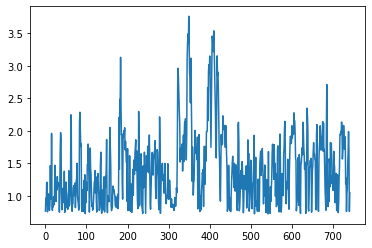

In [106]:
plt.plot(y_pred)

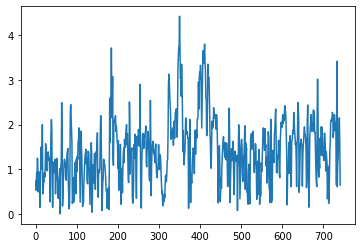

In [107]:
plt.plot(Y_test)

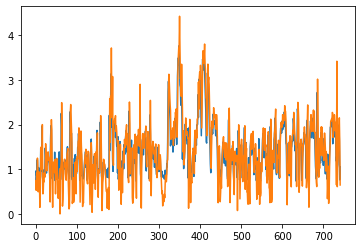

In [108]:
plt.plot(y_pred)
plt.plot(Y_test)

In [109]:
gpr.kernel_

WhiteKernel(noise_level=0.207) + 1.86**2 * ExpSineSquared(length_scale=1.63, periodicity=8.88)

In [110]:
kr.best_params_

{'alpha': 0.001,
 'kernel': ExpSineSquared(length_scale=0.599, periodicity=35.9)}

In [111]:
error = np.mean( Y_test != y_pred )

In [118]:
Y_test.shape

(742,)